In [22]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [4]:
url = "http://www.ncei.noaa.gov/thredds/dodsC/uv/6h_agg_rt/Preliminary_Aggregation_of_6h_Ocean_Wind_best.ncd"

In [23]:
t_min = np.datetime64('2015-06-01T00:00:00')
t_max = np.datetime64('2015-06-02T00:00:00')
x_min = -60 + 180
x_max = -40 + 180
y_min = 40
y_max = 60

In [24]:
ds = xr.open_dataset(url).sel(
                                time = slice(t_min, t_max),
                                lat = slice(y_min, y_max), 
                                lon = slice(x_min, x_max))

In [20]:
ds.variables['time'].values

array(['2015-06-01T00:00:00.000000000', '2015-06-01T06:00:00.000000000',
       '2015-06-01T12:00:00.000000000', '2015-06-01T18:00:00.000000000',
       '2015-06-02T00:00:00.000000000'], dtype='datetime64[ns]')

In [21]:
ds.variables['lon']

<xarray.IndexVariable 'lon' (lon: 0)>
array([], dtype=float32)
Attributes:
    units:                degrees_east
    long_name:            longitude
    grids:                uniform grids from 0.00 to 359.75 by 0.25
    _CoordinateAxisType:  Lon
    standard_name:        longitude

In [15]:
ds.variables

Frozen(OrderedDict([('zlev', <xarray.IndexVariable 'zlev' (zlev: 1)>
array([ 10.], dtype=float32)
Attributes:
    units:                   meters
    long_name:               height above sea level
    _CoordinateAxisType:     Height
    positive:                up
    _CoordinateZisPositive:  up), ('lat', <xarray.IndexVariable 'lat' (lat: 719)>
array([-89.75, -89.5 , -89.25, ...,  89.25,  89.5 ,  89.75], dtype=float32)
Attributes:
    units:                degrees_north
    long_name:            latitude
    grids:                uniform grids from -89.75 to 89.75 by 0.25
    _CoordinateAxisType:  Lat
    standard_name:        latitude), ('lon', <xarray.IndexVariable 'lon' (lon: 1440)>
array([  0.000000e+00,   2.500000e-01,   5.000000e-01, ...,   3.592500e+02,
         3.595000e+02,   3.597500e+02], dtype=float32)
Attributes:
    units:                degrees_east
    long_name:            longitude
    grids:                uniform grids from 0.00 to 359.75 by 0.25
    _CoordinateAxi

In [12]:
ds.variables['lon']

<xarray.IndexVariable 'lon' (lon: 1440)>
array([  0.000000e+00,   2.500000e-01,   5.000000e-01, ...,   3.592500e+02,
         3.595000e+02,   3.597500e+02], dtype=float32)
Attributes:
    units:                degrees_east
    long_name:            longitude
    grids:                uniform grids from 0.00 to 359.75 by 0.25
    _CoordinateAxisType:  Lon
    standard_name:        longitude

# Plot

In [31]:
from icedef import plot

In [29]:
lats = np.asarray(ds.lat)
lons = np.asarray(ds.lon) - 180

In [34]:
u = np.asarray(ds.u)[:,0,:,:]

v = np.asarray(ds.v)[:,0,:,:]

In [61]:
u.shape

(5, 81, 81)

In [92]:
np.where(np.isnan(u))

(array([0, 0, 0, ..., 4, 4, 4]),
 array([ 0,  0,  0, ..., 80, 80, 80]),
 array([ 0,  1,  2, ..., 78, 79, 80]))

In [93]:
tis, yis, xis = np.where(np.isnan(u))
bad_lats = lats[yis]
bad_lons = lons[xis]


In [99]:
u[4, 80, 80]

nan

In [97]:
yis

array([ 0,  0,  0, ..., 80, 80, 80])

In [96]:
tis

array([0, 0, 0, ..., 4, 4, 4])

In [94]:
xis

array([ 0,  1,  2, ..., 78, 79, 80])

In [82]:
max(u.flatten())

nan

In [80]:
len(bad_lons)

0

In [74]:
len(bad_lats)

3990

In [69]:
bad_lons

array([-51.25, -51.  , -50.75, ..., -40.25, -40.  , -40.  ], dtype=float32)

/home/evankielley/.conda/envs/icedef/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/evankielley/.conda/envs/icedef/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


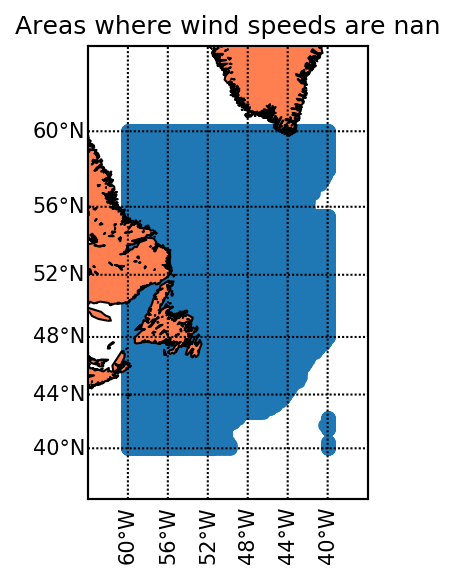

In [102]:
fig, ax = plt.subplots(dpi=150)
m = plot.get_mercator_basemap(bad_lons[0], bad_lons[-1], bad_lats[0], bad_lats[-1])

xs, ys = m(bad_lons, bad_lats)

ax.scatter(xs, ys)
plt.title('Areas where wind speeds are nan')
plt.show()

In [105]:
np.mean(u[~np.nan(u)])

TypeError: 'float' object is not callable

In [107]:
v

array([[[        nan,         nan,         nan, ...,  6.24250364,
          5.72690105,         nan],
        [        nan,         nan,         nan, ...,  6.30847359,
          5.52858734,         nan],
        [        nan,         nan,         nan, ...,  6.9082942 ,
          7.24985123,         nan],
        ..., 
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,  2.94563079,
          2.51748228,         nan],
        [        nan,         nan,         nan, ...,  3.17055464,
          1.52119076,         nan],
        [        nan,         nan,         nan, ...,  3.29515171,
          4.02740049,         nan],
        ..., 
        [        nan,         nan,         nan, ...,